In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df = pd.read_excel('Dados.xlsx')
df.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [12]:
df['Vendas_diaAnterior'] = df['Vendas'].shift(+1)
df['Vendas_2diasAtras'] = df['Vendas'].shift(+2)
df['Vendas_3diasAtras'] = df['Vendas'].shift(+3)
df.dropna(inplace = True)
df

,Data,Vendas,Vendas_diaAnterior,Vendas_2diasAtras,Vendas_3diasAtras
3,2022-12-09,742,1189.0,868.0,870.0
4,2022-12-10,317,742.0,1189.0,868.0
5,2022-12-11,685,317.0,742.0,1189.0
6,2022-12-12,1366,685.0,317.0,742.0
7,2022-12-13,1213,1366.0,685.0,317.0
8,2022-12-14,1055,1213.0,1366.0,685.0
9,2022-12-15,1343,1055.0,1213.0,1366.0
10,2022-12-16,832,1343.0,1055.0,1213.0
11,2022-12-17,240,832.0,1343.0,1055.0
12,2022-12-18,235,240.0,832.0,1343.0


In [25]:
from sklearn.linear_model import LinearRegression

modeloLinear = LinearRegression()


In [26]:
import numpy as np

x1,x2,x3,y = df['Vendas_diaAnterior'],df['Vendas_2diasAtras'],df['Vendas_3diasAtras'],df['Vendas']
x1,x2,x3,y = np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)

finalX = np.concatenate((x1,x2,x3), axis= 1)

print(finalX)

[[1189.  868.  870.]
 [ 742. 1189.  868.]
 [ 317.  742. 1189.]
 [ 685.  317.  742.]
 [1366.  685.  317.]
 [1213. 1366.  685.]
 [1055. 1213. 1366.]
 [1343. 1055. 1213.]
 [ 832. 1343. 1055.]
 [ 240.  832. 1343.]
 [ 235.  240.  832.]
 [1050.  235.  240.]
 [ 711. 1050.  235.]
 [ 745.  711. 1050.]
 [1009.  745.  711.]
 [  18. 1009.  745.]
 [  40.   18. 1009.]
 [  67.   40.   18.]
 [ 821.   67.   40.]
 [ 572.  821.   67.]
 [ 429.  572.  821.]
 [ 638.  429.  572.]
 [ 106.  638.  429.]
 [  54.  106.  638.]
 [ 144.   54.  106.]
 [ 814.  144.   54.]
 [ 679.  814.  144.]
 [ 712.  679.  814.]
 [1229.  712.  679.]
 [ 821. 1229.  712.]
 [ 319.  821. 1229.]
 [ 317.  319.  821.]
 [1317.  317.  319.]
 [ 807. 1317.  317.]
 [ 923.  807. 1317.]
 [1265.  923.  807.]
 [ 892. 1265.  923.]
 [ 289.  892. 1265.]
 [ 566.  289.  892.]
 [1692.  566.  289.]
 [1097. 1692.  566.]
 [1302. 1097. 1692.]
 [1405. 1302. 1097.]]


In [27]:
X_train,x_test,Y_train,y_test = finalX[:-30],finalX[-30:],y[:-30],y[-30:]

modeloLinear.fit(X_train,Y_train)

LinearRegression()

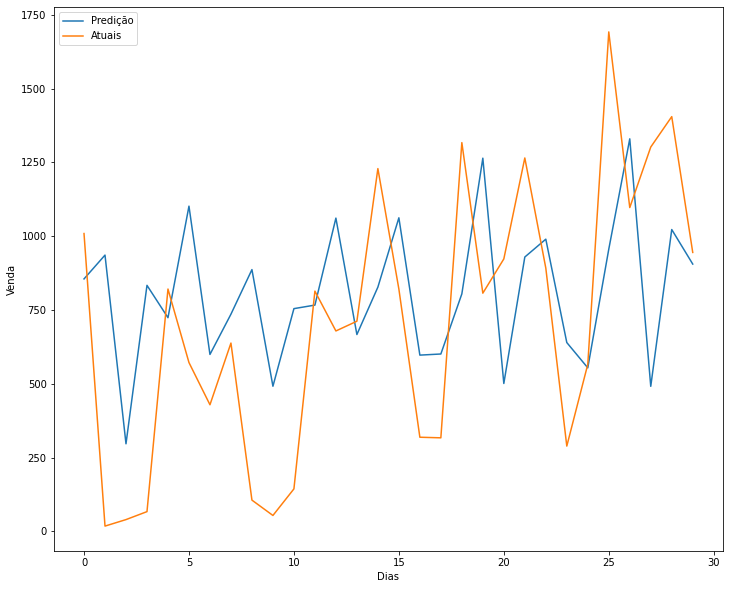

In [30]:
predicao = modeloLinear.predict(x_test)
plt.rcParams['figure.figsize'] = (12,10)
plt.plot(predicao,label = "Predição")
plt.plot(y_test,label = 'Atuais')
plt.xlabel("Dias")
plt.ylabel("Venda")
plt.legend(loc = 'upper left')
plt.show()
